In [1]:
#Importing necessary files
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

import xgboost as xgb
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

In [2]:
#### Import train and test date, also merging train and train_target file
df_train = pd.read_csv('C:/Users/Neeraj.mehta/Desktop/Python/Nepal Earthquake/train_values.csv')
df_train_target = pd.read_csv('C:/Users/Neeraj.mehta/Desktop/Python/Nepal Earthquake/train_labels.csv')
# df_test = pd.read_csv('C:/Users/Neeraj.mehta/Desktop/Python/Nepal Earthquake/test_values.csv')
df = pd.merge(df_train,df_train_target,on='building_id',how='left')

del df_train,df_train_target

Data Quality checks
1. Missing data
2. Duplicate data

In [3]:
#####Data quality check
df.isna().sum() #Check Blank values
df.duplicated().count() #Check Duplicate values
print('Check final dataframe for blank values',df.isna().sum()) 
df_target = df['damage_grade'].copy()
df_train = df.drop(columns=['damage_grade','building_id'])

Check final dataframe for blank values building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber            

Exploratry data Analysis.
1. Evaluate Each Column: Review each column to identify redundant or irrelevant features. Columns with similar relationships to the dependent variable may be candidates for removal or consolidation.

2. Analyze Independent-Dependent Relationship: Investigate the relationship between independent and dependent variables to understand how each feature influences the target variable. This helps identify significant predictors and potential areas for further analysis.

3. Assess Data Skewness: Check the skewness of the data distribution to understand its symmetry or lack thereof. Skewed data can impact the performance of certain statistical models and may require transformation to improve model accuracy.

In [4]:
df['count_floors_pre_eq'].value_counts()
df.pivot_table(index='count_floors_pre_eq', columns='damage_grade', aggfunc='size', fill_value=0) #Checking correlation between floor and damanage

damage_grade,1,2,3
count_floors_pre_eq,,,
1,8969,20798,10674
2,12593,93968,50062
3,2537,28479,24601
4,707,3374,1343
5,254,1481,511
6,53,133,23
7,10,25,4
8,0,1,0
9,1,0,0


We are currently working on gathering information for 26,00,000 buildings. Given that there are very few buildings with floor levels greater than 5, we are consolidating them into a single category labeled '5+'."

In [5]:
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].apply(lambda x: 1 if x == 1 else (2 if x == 2 else (3 if x == 3 else (4 if x == 4 else 5))))
df['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2496
Name: count_floors_pre_eq, dtype: int64

In [6]:
df['geo_level_1_id'].value_counts()
df.pivot_table(index='geo_level_1_id', columns='damage_grade', aggfunc='size', fill_value=0) #Checking correlation between floor and damanage

damage_grade,1,2,3
geo_level_1_id,,,
0,337,3075,599
1,411,1985,305
2,85,610,236
3,245,4550,2745
4,521,11164,2883
5,446,2014,230
6,2108,16222,6051
7,1033,11273,6688
8,654,8513,9913


In [7]:
df['geo_level_2_id'].value_counts()

39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
1330       1
1043       1
637        1
989        1
627        1
Name: geo_level_2_id, Length: 1414, dtype: int64

In [8]:
df['geo_level_3_id'].value_counts()

633      651
9133     647
621      530
11246    470
2005     466
        ... 
2366       1
7155       1
10733      1
97         1
3085       1
Name: geo_level_3_id, Length: 11595, dtype: int64

In [9]:
df['age'].value_counts()
df.pivot_table(index='age', columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
age,,,
0,7213,12721,6107
5,5590,19030,9077
10,4360,22370,12166
15,2878,20767,12365
20,1954,18603,11625
25,1131,14073,9162
30,640,10444,6944
35,352,6246,4112
40,283,6088,4188


As building ages are skewed let's bucket them into 6 buckets, we can use pandas cut method  
0-10 years
10-20
20-30
30-40
40-100
100-1000

In [ ]:
df['age_bucket'] = pd.cut(df['age'],bins= [0,10,20,30,40,100,1000], labels= (1,2,3,4,5,6))
df.pivot_table(index='age_bucket', columns='age', aggfunc='size', fill_value=0) #Checking data values

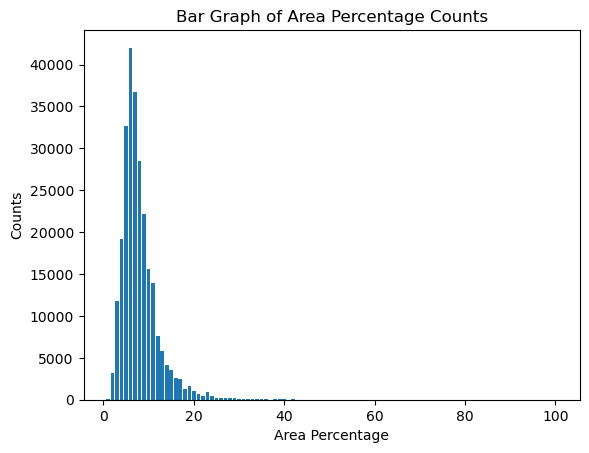

In [10]:
df['area_percentage'].value_counts()

df.pivot_table(index='area_percentage', columns='damage_grade', aggfunc='size', fill_value=0)

#Extracting values
area_values = df['area_percentage'].value_counts().sort_index()
plt.bar(area_values.index, area_values.values)
plt.xlabel('Area Percentage')
plt.ylabel('Counts')
plt.title('Bar Graph of Area Percentage Counts')
plt.show()

To simplify the model learning process, we will adjust values above 45% to 45%, as there are very few values categorized below 45%.

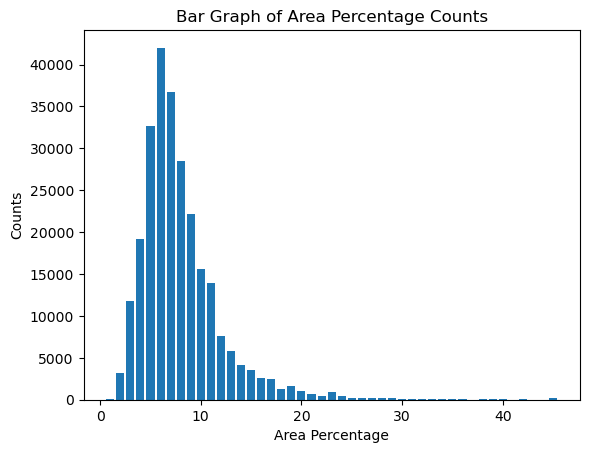

In [12]:
df['area_percentage'] = df['area_percentage'].apply(lambda x:45 if x > 45 else x)
#Extracting values
area_values = df['area_percentage'].value_counts().sort_index()
plt.bar(area_values.index, area_values.values)
plt.xlabel('Area Percentage')
plt.ylabel('Counts')
plt.title('Bar Graph of Area Percentage Counts')
plt.show()

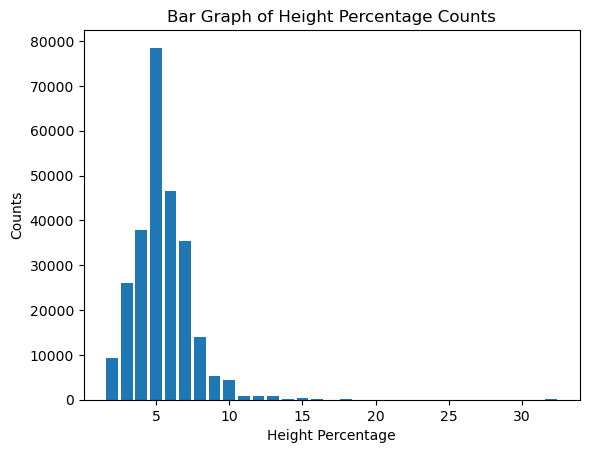

In [13]:
df['height_percentage'].value_counts()

height_values = df['height_percentage'].value_counts().sort_index()
plt.bar(height_values.index, height_values.values)
plt.xlabel('Height Percentage')
plt.ylabel('Counts')
plt.title('Bar Graph of Height Percentage Counts')
plt.show()

Check correlation between count_floors_pre_eq and height_percentage related. If both are correlated maybe we can remove one variable. For now we are keeping it in the model, but we are bucketing > 15% hieght into one bucket

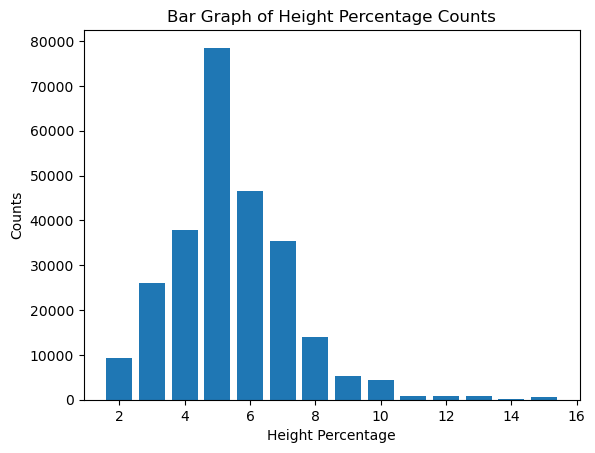

In [14]:
df['height_percentage'] = df['height_percentage'].apply(lambda x:15 if x > 15 else x)
#Plotting values
height_values = df['height_percentage'].value_counts().sort_index()
plt.bar(height_values.index, height_values.values)
plt.xlabel('Height Percentage')
plt.ylabel('Counts')
plt.title('Bar Graph of Height Percentage Counts')
plt.show()

In [15]:
df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [17]:
df['foundation_type'].value_counts()
df.pivot_table(index='foundation_type',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
foundation_type,,,
h,358,579,511
i,6004,4354,221
r,10720,125515,82961
u,3689,8541,2030
w,4353,9270,1495


In [18]:
df['roof_type'].value_counts()
df.pivot_table(index='roof_type',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
roof_type,,,
n,13547,106447,62848
q,3926,34009,23641
x,7651,7803,729


In [19]:
df['ground_floor_type'].value_counts()
df.pivot_table(index='ground_floor_type',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
ground_floor_type,,,
f,12474,119877,77268
m,90,343,75
v,10309,12971,1313
x,2052,14536,8289
z,199,532,273


In [20]:
df['other_floor_type'].value_counts()
df.pivot_table(index='other_floor_type',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
other_floor_type,,,
j,8886,20362,10595
q,7387,98320,59575
s,5423,5904,701
x,3428,23673,16347


We can group floor types and create a building type variable. Then, we can apply clustering to identify different building types, which can be used as input for a supervised model. For now we will not do it as we don't have any understand of the the attribute levels.

In [23]:
df['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [21]:
df['plan_configuration'].value_counts()
df.pivot_table(index='ground_floor_type',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
ground_floor_type,,,
f,12474,119877,77268
m,90,343,75
v,10309,12971,1313
x,2052,14536,8289
z,199,532,273


My hypothesis is that these two variables may not initially contribute significantly to the model's performance. However, I propose to retain them for further analysis to ascertain their importance

In [25]:
df['legal_ownership_status'].value_counts()
df.pivot_table(index='legal_ownership_status',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
legal_ownership_status,,,
a,1511,3074,927
r,213,727,533
v,23270,143154,84515
w,130,1304,1243


In [26]:
df['count_families'].value_counts()
df.pivot_table(index='count_families',columns='damage_grade', aggfunc='size', fill_value=0)

damage_grade,1,2,3
count_families,,,
0,3663,11361,5838
1,20339,129721,76055
2,829,6021,4444
3,221,886,695
4,46,205,138
5,17,51,36
6,4,8,10
7,3,2,2
8,1,1,0


In [27]:
#Identify numerical and categorical columns
num_col = []  # List for numerical columns
cat_col = []  # List for categorical columns

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        num_col.append(col)
    # Check the dtype of the column
    elif df[col].dtype == 'object':  # Assuming 'object' dtype represents categorical columns
        cat_col.append(col)

print("Numerical Columns:", num_col)
print("Categorical Columns:", cat_col)


Numerical Columns: ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']
Categorical Columns: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_

In [28]:
#Removing target variable
num_col1 = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']
print(num_col1)

['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


In [29]:
#Creating dummy variables using pandas same can be done using hotencoder 
dummy_df = pd.get_dummies(df[cat_col])
df_dummies = pd.concat([df[num_col1], dummy_df], axis=1)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(df_dummies,df['damage_grade'],test_size=0.2,random_state=42)
#One hot encoder, creating pipeline to process categorical values , we are not doing scaler featuring to numeric variables in the first iteration  

# choosing model for the pipeline
ML_model = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Initialize a list to store model accuracies
Model_accuracy = []

# Iterate over each model
for model_name, model in ML_model.items():
    model.fit(x_train, y_train)    # Fit the model
    y_pred = model.predict(x_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred)    # Calculate accuracy
    Model_accuracy.append([model_name, accuracy]) # Append model name and accuracy to Model_accuracy list
    
# Convert Model_accuracy to a DataFrame for easier manipulation
Model_accuracy_df = pd.DataFrame(Model_accuracy, columns=['Model_name', 'Accuracy'])

In [31]:
print(Model_accuracy_df)

                   Model_name  Accuracy
0      RandomForestClassifier  0.717791
1      DecisionTreeClassifier  0.644711
2  GradientBoostingClassifier  0.681510


The RandomForest Classifier achieved the highest accuracy. We will proceed to fine-tune the RandomForestClassifier using Randomized SearchCV. Considering CPU usage constraints, we may limit the search to a subset of variables, which could affect the desired outcome.

In [34]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

model1 = RandomForestClassifier()


# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 150),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Instantiate the Random Search
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    random_state=42
)

# Fit the Random Search
y_pred_ran = random_search.fit(x_train, y_train)

# Access results
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 53}
Best Score: 0.6280794320798159


Tuning the model is resulting in a decrease in accuracy. We will examine the original model's hyperparameters to understand what contributed to the 72% accuracy

In [32]:
# Define the hyperparameter space
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y_pred_ran = model2.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred_ran)
print(accuracy1)

0.7156424473820533


In [33]:
model_params = model.get_params()

# Print the parameters
for param, value in model_params.items():
    print(f"{param}: {value}")

ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: log_loss
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: None
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [35]:

feature_importances = model.feature_importances_ # Match feature importances with feature names
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) # Create a DataFrame to display feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort the DataFrame by importance
print(importance_df) # Print the DataFrame
write

                                Feature  Importance
1                        geo_level_1_id    0.527552
36                    foundation_type_r    0.181202
44                  ground_floor_type_v    0.047921
2                        geo_level_2_id    0.040499
9   has_superstructure_mud_mortar_stone    0.031482
..                                  ...         ...
26           has_secondary_use_industry    0.000000
27        has_secondary_use_health_post    0.000000
28         has_secondary_use_gov_office    0.000000
29         has_secondary_use_use_police    0.000000
56                 plan_configuration_c    0.000000

[69 rows x 2 columns]


Importance of the features :
geo_level_1_id - 0.5275522332
foundation_type_r - 0.1812021814
ground_floor_type_v - 0.0479212262
geo_level_2_id - 0.0404990024
has_superstructure_mud_mortar_stone - 0.0314824205
age - 0.0309310488
has_superstructure_cement_mortar_brick - 0.0229116265
other_floor_type_q - 0.0215549707
foundation_type_i - 0.0129384629
roof_type_x - 0.009395695
count_floors_pre_eq - 0.0073004671
has_superstructure_stone_flag - 0.0058311608
has_superstructure_timber - 0.0055630482
geo_level_3_id - 0.0053061791
area_percentage - 0.0049230414
has_secondary_use - 0.0044883

Accuracy seems to be very low , we have not done any transformation. We will try to understand how model will do when we focus first only on the geographical parameters, and second towards the House features

In [37]:
Geo_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
hp_features = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']
Owernership_features =['count_families','legal_ownership_status']
Uses_features = ['has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']
superstructure_features = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']

Geo Feature relationship with Building damage

In [38]:
x_train,x_test,y_train,y_test = train_test_split(df[Geo_features],df['damage_grade'],test_size=0.2,random_state=42)

ml = RandomForestClassifier()
ml.fit(x_train,y_train)
y_pred = ml.predict(x_train)
y_pred_test = ml.predict(x_test)
print('Accuracy of train data',accuracy_score(y_train,y_pred))
print('Accuracy of test data',accuracy_score(y_test,y_pred_test))

Accuracy of train data 0.7370970836531082
Accuracy of test data 0.7138965100439362


To enhance the model's accuracy, geographical features can be clustered and used as input. This approach helps identify spatial patterns and relationships that may influence earthquake damage. By grouping similar geographical areas together, the model can capture localized variations in vulnerability. These clusters can be based on factors such as terrain type, proximity to fault lines, elevation, soil composition, and urban density. Integrating geographical clusters into the model enables more tailored predictions, accounting for the specific characteristics of different regions within Kathmandu.

In [39]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# kmeans.fit(df_final_train[Geo_features])

sse = []
for k in range(1, 11):
   kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=10)
   kmeans.fit(df_dummies[Geo_features])
   sse.append(kmeans.inertia_)

df[Geo_features].describe()
geo = kmeans.predict(df_dummies[Geo_features])

In [40]:
# Get cluster labels for each data point
clusters = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_dummies['Cluster'] = clusters

In [41]:
df_dummies_cluster = df_dummies.drop(Geo_features, axis=1)
df_dummies_cluster = df_dummies_cluster.drop('building_id', axis=1)
df_dummies_cluster.head()

In [44]:
x_train,x_test,y_train,y_test = train_test_split(df_dummies_cluster,df['damage_grade'],test_size=0.2,random_state=42)
#One hot encoder, creating pipeline to process categorical values , we are not doing scaler featuring to numeric variables in the first iteration  

# choosing model for the pipeline
ML_model = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Initialize a list to store model accuracies
Model_accuracy = []

# Iterate over each model
for model_name, model in ML_model.items():
    model.fit(x_train, y_train)    # Fit the model
    y_pred = model.predict(x_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred)    # Calculate accuracy
    Model_accuracy.append([model_name, accuracy]) # Append model name and accuracy to Model_accuracy list
    
# Convert Model_accuracy to a DataFrame for easier manipulation
Model_accuracy_df = pd.DataFrame(Model_accuracy, columns=['Model_name', 'Accuracy'])

In [45]:
print(Model_accuracy)

[['RandomForestClassifier', 0.6044204831066173], ['DecisionTreeClassifier', 0.5518313155925635], ['GradientBoostingClassifier', 0.597436733754149]]


This apporach also doesn't increase any accuracy. We are concluding this project with 72% accuracy that we have achieved from the random forest model
0      RandomForestClassifier  0.717791
1      DecisionTreeClassifier  0.644711
2  GradientBoostingClassifier  0.681510